In [39]:
#dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
from sqlite3 import Error
from PIL import Image
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
#nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
#nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
#create the pandas data frame
wine_df = pd.read_csv('/Users/nico_marais/code/Liedjieboer/forward_farming/clean_data/clean_winemag_coord.csv')
#display the top 3 records from the data frame
wine_df.head(3)

,Unnamed: 0,country,description,region_1,lat,lon
0,4,US,"Much like the regular bottling from 2012, this...",Willamette Valley,44.942554,-122.933762
1,21,US,"A sleek mix of tart berry, stem and herb, alon...",Oregon,43.804133,-120.554201
2,25,US,Oak and earth intermingle around robust aromas...,Sonoma Coast,38.424211,-123.101173


In [41]:
#inline function to produce word count, splitting on spaces
wine_df['word_count'] = wine_df['description'].apply(lambda x: len(str(x).split(" ")))
wine_df.word_count.describe()

count    17301.000000
mean        40.407144
std         11.548225
min          6.000000
25%         32.000000
50%         40.000000
75%         48.000000
max        116.000000
Name: word_count, dtype: float64

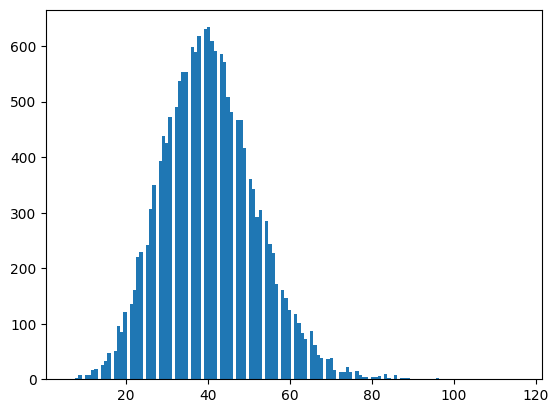

In [42]:
#set x for the histogram and set bins based on max
x = wine_df['word_count']
n_bins = 140
#plot histogram
plt.hist(x, bins=n_bins)
plt.show()

In [43]:
stop_words = set(stopwords.words("english"))
#show how many words are in the list of stop words
print(len(stop_words))
#179
print(stop_words)

179
{'down', 'more', 'why', 'ain', 'some', 'them', 'should', 'were', 'don', 'couldn', 'up', 'under', "aren't", 'only', "didn't", 'if', 'will', 'be', 'on', 'ourselves', 'both', "shan't", 'or', 've', "needn't", 'now', 'hadn', 'me', 'than', 'has', 'are', 'as', 'below', "you're", "you'll", 'can', 'from', 'no', "wouldn't", 'weren', "you'd", 'until', "shouldn't", 'been', 'yours', 'not', 'won', "won't", 'in', 'to', 'its', 'll', "couldn't", 'those', "she's", 'of', 'then', "should've", 'above', 'just', 'hasn', 'my', 'yourself', 'this', 'do', 'with', 'after', 'when', 's', 'shouldn', 'his', 'out', "wasn't", 'nor', 'he', 'during', 'had', 'which', 'these', 'did', 'and', 'but', 'who', "that'll", 'y', "weren't", 'wouldn', 'how', 'have', "mustn't", 'needn', 'between', 'wasn', 'doesn', 'while', "don't", 'her', 'off', 'does', 'doing', 'few', 'you', 'itself', 'once', 'yourselves', 'myself', 'ours', 'own', 'too', 'herself', 'didn', 'further', 'our', 'other', 'isn', 'i', 'very', "it's", 'theirs', 'most', '

In [44]:
#loops through descriptions and cleans them
clean_desc = []
for w in range(len(wine_df.description)):
    desc = wine_df['description'][w].lower()
    
    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove digits and special chars
    desc=re.sub("(\\d|\\W)+"," ",desc)
    
    clean_desc.append(desc)
#assign the cleaned descriptions to the data frame
wine_df['clean_desc'] = clean_desc
wine_df['clean_desc']

0        much like the regular bottling from this comes...
1        a sleek mix of tart berry stem and herb along ...
2        oak and earth intermingle around robust aromas...
3        as with many of the erath vineyard designates ...
4        a stiff tannic wine this slowly opens and brin...
                               ...                        
17296    a blend from several premier cru vineyards in ...
17297    this is the winery s bells and whistles chardo...
17298    a chardonnay with an unusual companion s millo...
17299    there s no bones about the use of oak in this ...
17300    citation is given as much as a decade of bottl...
Name: clean_desc, Length: 17301, dtype: object

In [45]:
#calculate the frequency
word_frequency = pd.Series(' '.join(wine_df['clean_desc']).split()).value_counts()[:50]
word_frequency

and           44847
the           30859
a             25286
of            22366
this          15600
with          14920
it            12971
is            12060
wine          11447
in            10963
flavors        8615
s              8111
to             7959
fruit          6589
on             5944
acidity        5534
from           5518
that           5378
cherry         4338
but            3745
oak            3708
finish         3625
palate         3576
ripe           3512
for            3460
drink          3310
has            3125
are            2854
aromas         2770
as             2720
pinot          2706
rich           2666
red            2650
by             2642
its            2607
apple          2543
tannins        2538
an             2511
light          2390
now            2328
chardonnay     2274
texture        2203
black          2192
nose           2174
full           2013
vineyard       1976
spice          1942
well           1935
bodied         1891
vanilla        1888


In [53]:
# add single word to stoplist
# stop_words.add("drink")

#add list of words to stoplist
add_stopwords = ["pre", "bottle", "much"]
stop_words = stop_words.union(add_stopwords)

In [54]:
stem_desc = []
for w in range(len(wine_df['clean_desc'])):
    split_text = wine_df['clean_desc'][w].split()


In [55]:
#Lemmatisation
lem = WordNetLemmatizer()
split_text = [lem.lemmatize(word) for word in split_text if not word in stop_words] 
split_text = " ".join(split_text)
stem_desc.append(split_text)
len(stem_desc)

1

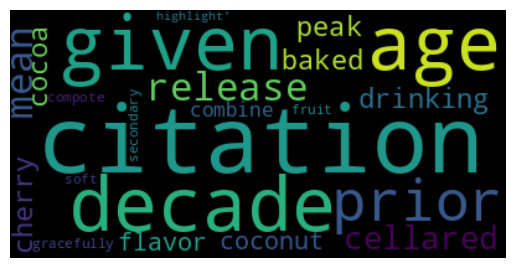

In [56]:
wc = WordCloud()
wc.generate(str(stem_desc))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

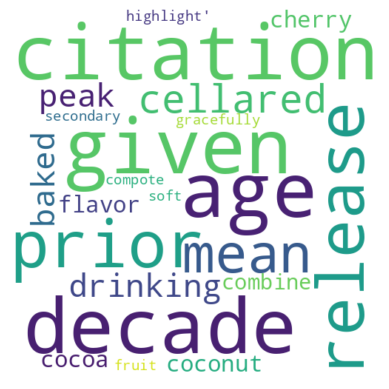

In [57]:
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=500, height=500)
wc.generate(str(stem_desc))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

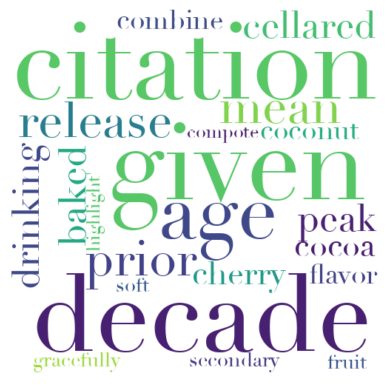

In [58]:
font_path = '/System/Library/Fonts/Didot.ttc'
wc = WordCloud(stopwords=STOPWORDS, font_path=font_path, 
               background_color="white", max_words=2000,
               max_font_size=256, random_state=42,
               width=500, height=500)
wc.generate(str(stem_desc))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

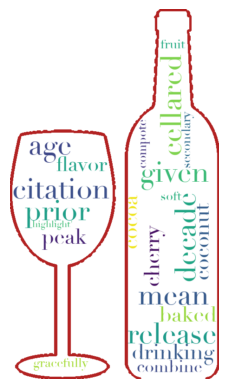

In [60]:
mask = np.array(Image.open('/Users/nico_marais/Desktop/kindpng_7686566.png'))
wc = WordCloud(stopwords=STOPWORDS, font_path=font_path,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256, contour_width=5, contour_color='firebrick',
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(str(stem_desc))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [17]:
def one_color_func(word=None, font_size=None, 
                   position=None, orientation=None, 
                   font_path=None, random_state=None):
    h = 360 # 0 - 360
    s = 83 # 0 - 100
    l = 26 # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

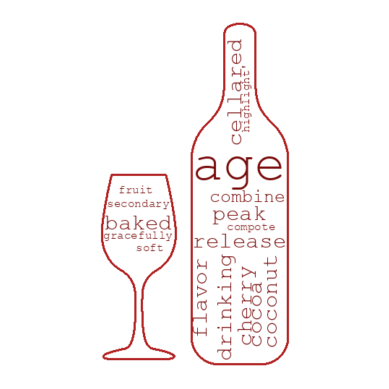

In [31]:
wc = WordCloud(stopwords=STOPWORDS, font_path=font_path,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256, contour_width=3, contour_color='firebrick',
               random_state=42, width=mask.shape[1],
               height=mask.shape[0], color_func=one_color_func)
wc.generate(str(stem_desc))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [21]:
def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 360 # 0 - 360
    s = 83 # 0 - 100
    l = random_state.randint(30, 70) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

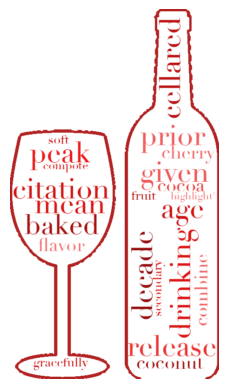

In [61]:
wc = WordCloud(stopwords=STOPWORDS, font_path=font_path,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256, contour_width=5, contour_color='firebrick',
               random_state=42, width=mask.shape[1],
               height=mask.shape[0], color_func=similar_color_func)
wc.generate(str(stem_desc))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [23]:
def multi_color_func(word=None, font_size=None,
                     position=None, orientation=None,
                     font_path=None, random_state=None):
    colors = [[4, 77, 82],
              [25, 74, 85],
              [82, 43, 84],
              [158, 48, 79]]
    rand = random_state.randint(0, len(colors) - 1)
    return "hsl({}, {}%, {}%)".format(colors[rand][0], colors[rand][1], colors[rand][2])

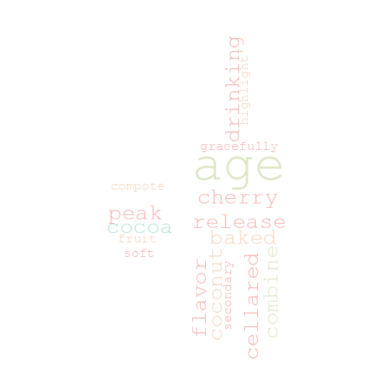

In [24]:
wc = WordCloud(stopwords=STOPWORDS, font_path=font_path,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0], color_func=multi_color_func)
wc.generate(str(stem_desc))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

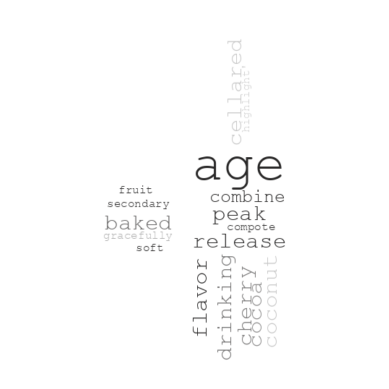

In [26]:
mask_colors = ImageColorGenerator(mask)
wc = WordCloud(stopwords=STOPWORDS, font_path=font_path,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0], color_func=mask_colors)
wc.generate(str(stem_desc))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#set the word cloud parameters
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'black', 
                      stopwords = stop_words, 
                      max_words = 1000, 
                      min_font_size = 20).generate(str(stem_desc))

In [ ]:
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
#fig.savefig("wordcloud.png")

In [ ]:
def get_trigrams(descriptions, n=None):
    
    vec = CountVectorizer(ngram_range = (3,3), max_features = 20000).fit(descriptions)
    bag_of_words = vec.transform(descriptions)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, i]) for word, i in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse = True)
   
    return words_freq[:n]

In [ ]:
stops = ['wine','the', 'drink', 'an', 'cabernet', 'sauvignon', 'black', 'cherry']
stem_desc = []
for w in range(len(wine_df['clean_desc'])):
    split_text = wine_df['clean_desc'][w].split()
       
    #Lemmatisation
lem = WordNetLemmatizer()
split_text = [lem.lemmatize(word) for word in split_text if not word in stops] 
split_text = " ".join(split_text)
stem_desc.append(split_text)
trigrams = get_trigrams(clean_desc, n=15)


In [ ]:
#create a trigram data frame
trigram_df = pd.DataFrame(trigrams)
trigram_df.columns=["Trigram", "Freq"]
#output top 15 rows
trigram_df.head(15)
fig = sns.set(rc = {'figure.figsize':(12,8)})
bp = sns.barplot(x = "Trigram", y = "Freq", data = trigram_df)
bp.set_xticklabels(bp.get_xticklabels(), rotation = 75)
plt.show()

In [ ]:
trigram_df

In [ ]:
wine_mask = np.array(Image.open("/Users/nico_marais/Desktop/wine_mask.png"))
wine_mask

In [ ]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [ ]:
# # Transform your mask into a new one that will work with the function:
# transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

# for i in range(len(wine_mask)):
#     transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))


In [ ]:
text = " ".join(w for w in stem_desc)
text